In [1]:
import scipy.io
import numpy as np, h5py
from matplotlib import pyplot as plt
import copy
import pickle
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt

In [3]:
data = h5py.File('littleScans62.mat', 'r')
Xscans=data.get('littleScans')

In [4]:
print Xscans.shape

(16, 16, 16, 62)


In [5]:
X=copy.copy(Xscans)
X=np.expand_dims(X,0)
X=X.reshape((62, 16, 16, 16, 1))

In [6]:
print X.shape

(62, 16, 16, 16, 1)


In [7]:
y=np.zeros((np.shape(X)[0],1))
y[:26]=1

In [8]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
enc.fit(y)

OneHotEncoder(categorical_features='all', dtype=<type 'float'>,
       handle_unknown='error', n_values='auto', sparse=True)

In [14]:
ysq=np.squeeze(y).astype(int)

In [15]:
ysq

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

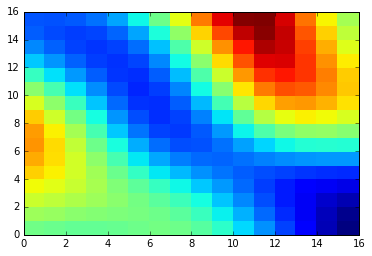

In [10]:
plt.pcolor(Xscans[0,:,:,10])

In [12]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers.convolutional import Convolution3D
from keras.layers.pooling import MaxPooling3D
from keras.layers.core import Dense, Flatten
import time

Using TensorFlow backend.


In [16]:
from keras.utils.np_utils import to_categorical
y_binary = to_categorical(ysq)

image dimension order according https://www.youtube.com/watch?v=38ASRfA23t0   
tf: inputshape=(img_rows, img_cols,img_channels)   
theano: inputshape=(img_channels,img_rows, img_cols)

In [19]:
model.reset_states()

In [17]:
model=Sequential()
model.add(Convolution3D(10, 3, 3, 3, input_shape=(16, 16, 16,1), border_mode='valid', activation='relu'))
model.add(Flatten())
model.add(Dense(100, init='uniform', activation='tanh'))
model.add(Dense(2, init='uniform', activation='tanh'))
#model.add(MaxPooling3D(pool_size=(2,2,2),strides=None, border_mode='valid', dim_ordering='default'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [19]:
# Fit the model
t0 = time.time()
history=model.fit(X, y_binary, nb_epoch=2000, batch_size=10)
t1 = time.time()
print t1-t0

Epoch 1/2000
62/62 [==============================] - 15s - loss: 7.4537 - acc: 0.4597    
Epoch 2/2000
62/62 [==============================] - 10s - loss: 5.0128 - acc: 0.4516    
Epoch 3/2000
62/62 [==============================] - 11s - loss: 3.8034 - acc: 0.4435    
Epoch 4/2000
62/62 [==============================] - 10s - loss: 3.5217 - acc: 0.5323    
Epoch 5/2000
62/62 [==============================] - 10s - loss: 3.2740 - acc: 0.5565    
Epoch 6/2000
62/62 [==============================] - 10s - loss: 3.1614 - acc: 0.5484    
Epoch 7/2000
62/62 [==============================] - 10s - loss: 3.1607 - acc: 0.5645    
Epoch 8/2000
62/62 [==============================] - 10s - loss: 3.1616 - acc: 0.5645    
Epoch 9/2000
62/62 [==============================] - 10s - loss: 3.0624 - acc: 0.5645    
Epoch 10/2000
62/62 [==============================] - 10s - loss: 2.2949 - acc: 0.5806    
Epoch 11/2000
62/62 [==============================] - 10s - loss: 1.4755 - acc: 0.5806  

In [21]:
model.save('m3_2000.h5')

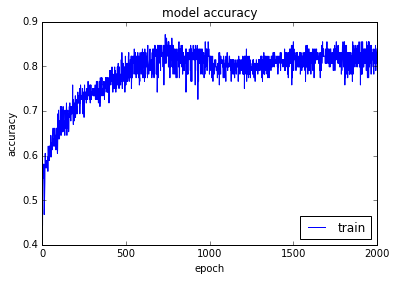

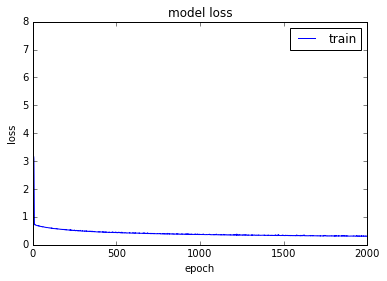

In [20]:
###### PLOTS summarize history for accuracy
plt.plot(history.history['acc'])
#plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='lower right')
plt.show()
# summarize history for accuracy
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper right')
plt.show()

---

### Model 1
model=Sequential()   
model.add(Convolution3D(10, 3, 3, 3, input_shape=(16, 16, 16,1), border_mode='valid', activation='relu'))   
model.add(Flatten())   
model.add(Dense(100, init='uniform', activation='tanh'))   
model.add(Dense(2, init='uniform', activation='tanh'))   
#model.add(MaxPooling3D(pool_size=(2,2,2),strides=None, border_mode='valid', dim_ordering='default'))   

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])   

---